## 1. Preprocesamiento, métricas de datos y knn

---



### Limpieza del set de datos

Primero importaremos la librería pandas para manejar el set de datos y os para obtener el path para abrir el archivo

In [ ]:
import pandas as pd
import os
import numpy as np
np.random.seed(1234)

Abrimos el archivo indexando por ```PassengerId```

Para esta actividad se usó la base de datos de supervivencia del titanic que se puede obtener del siguiente link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [ ]:
data = pd.read_csv("Titanic-Dataset.csv", index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Vemos que datos no tenemos, isna() devuelve un booleano True en caso de que haya un valor NA y False en caso contrario.

In [ ]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Hay ciertos datos, como ```Name```, ```Ticket``` y ```Cabin``` que no son relevantes para el clasificador por lo que no nos importa si tenemos el dato exacto o no. Por lo tanto, eliminaremos las entradas que tengan ```NaN``` y sean pocos de estos por columna (como ```Sex```, ```SibSp``` y ```Parch``` por ejemplo). Asimismo, hay muchas entradas que no tienen la edad por lo que eliminaremos esa columna para no perder una gran cantidad de datos.

In [ ]:
data.drop("Age", axis=1, inplace=True)
data.dropna(subset=["Embarked", "Sex", "SibSp", "Parch", "Fare", "Survived"], inplace=True)
data

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S


### Comprensión de los datos

#### 1.

Primero buscaremos ver si hay una relación entre supervivencia y ```Pclass```

In [ ]:
data.groupby("Pclass").mean()["Survived"]

<ipython-input-29-da3c05bcae26>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Pclass").mean()["Survived"]


Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Se observa claramente que entre mayor es la clase, mayor es la supervivencia.

#### 2.

Buscaremos ahora una relación entre supervivencia y `Sex`.

In [ ]:
data.groupby("Sex").mean()["Survived"]

<ipython-input-30-55ee2a533e0c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Sex").mean()["Survived"]


Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

Veremos ahora estas dos estadísticas por `Sex` y `Pclass`.

In [ ]:
data.groupby(["Sex", "Pclass"]).mean()["Survived"]

<ipython-input-31-fe81ae8f91b6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(["Sex", "Pclass"]).mean()["Survived"]


Sex     Pclass
female  1         0.967391
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

#### 3.

Buscaremos ahora ver si hay una relación entre puerto de embarque y supervivencia.

In [ ]:
data.groupby(["Embarked"]).mean()["Survived"]

<ipython-input-32-b6c26a0f1080>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(["Embarked"]).mean()["Survived"]


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Se observa que la mayoría de los que embarcaron en Cherbourg sobrevivieron.

Finalmente veremos si hay alguna relación entre la tarifa del pasaje `Fare` y `Pclass`.

In [ ]:
data.groupby("Pclass").describe()["Fare"]

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,214.0,84.193516,78.746457,0.0,30.77185,58.6896,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


Se observa claramente que los pasajes más caros corresponden a los de primera clase y los más baratos a los de tercera clase. Esto era esperado.

### Pre-procesamiento de los datos

Revisamos la cantidad de categorías distintas por columna

In [ ]:
data.nunique()

Survived      2
Pclass        3
Name        889
Sex           2
SibSp         7
Parch         7
Ticket      680
Fare        247
Cabin       146
Embarked      3
dtype: int64

Como haremos un clasificador utilizando los k vecinos más cercanos, no nos sirve para clasificar ni el `Name`, ni `Cabin` ni `Ticket` del pasajero. Es por esto que eliminaremos estas columnas para entrenar el modelo. Asimismo, la columna `Fare` toma muchos valores posibles por lo que la tranformaremos en categórica. Tendremos entonces:

1. `Low`: `Fare < 15`
2. `Medium`: `15 <= Fare < 30`
3. `High`: `30 <= Fare`



In [ ]:
data_training = data.drop(["Name", "Ticket", "Cabin"], axis=1)

data_training["Fare"] = pd.cut(data_training.Fare, bins=[-1, 15, 30, 550], labels=["Low", "Medium", "High"])

data_training

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,Low,S
2,1,1,female,1,0,High,C
3,1,3,female,0,0,Low,S
4,1,1,female,1,0,High,S
5,0,3,male,0,0,Low,S
...,...,...,...,...,...,...,...
887,0,2,male,0,0,Low,S
888,1,1,female,0,0,Medium,S
889,0,3,female,1,2,Medium,S


Luego, utilizaremos la función `get_dummies()` de `pandas` para pasar las columnas de strings a valores númericos

In [ ]:
data_training = pd.get_dummies(data_training, columns=["Sex", "Fare", "Embarked"])
data_training

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Fare_Low,Fare_Medium,Fare_High,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,1,0,0,1,1,0,0,0,0,1
2,1,1,1,0,1,0,0,0,1,1,0,0
3,1,3,0,0,1,0,1,0,0,0,0,1
4,1,1,1,0,1,0,0,0,1,0,0,1
5,0,3,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,0,0,1,1,0,0,0,0,1
888,1,1,0,0,1,0,0,1,0,0,0,1
889,0,3,1,2,1,0,0,1,0,0,0,1


Nos interesa ahora saber el tamaño del dataset con el que trabajaremos

In [ ]:
data_training.shape

(889, 12)

Ahora debemos separar los datos en la matriz de características (`X`) y el vector de etiquetas (`y`) para trabajar con el

In [ ]:
X = data_training.loc[:, data_training.columns != "Survived"]
y = data_training["Survived"]

Utilizaremos `train_test_split` de `sklearn.model_selection` para dividir los datos en sets de entrenamiento y test. Elegiremos un 80% de los datos para entrenar y 20% para test. Esto de acuerdo a lo visto en clases que recomendaba utilizar 60-80% para entrenamiento y 20-40% para test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Veremos el tamaño de nuestros sets

In [ ]:
print(f"Tamaño X train {X_train.shape}")
print(f"Tamaño y train {y_train.shape}")
print(f"Tamaño X test  {X_test.shape}")
print(f"Tamaño y test  {y_test.shape}")

Tamaño X train (711, 11)
Tamaño y train (711,)
Tamaño X test  (178, 11)
Tamaño y test  (178,)


Mediremos ahora la cantidad de `Survived` en cada set.

In [ ]:
print(f"Survived en set entrenamiento: {y_train.sum()}")
print(f"Survived en set test: {y_test.sum()}")

Survived en set entrenamiento: 272
Survived en set test: 68


Sin embargo, nos interesa la proporción de estos.

In [ ]:
print(f"Survived en set entrenamiento: {y_train.sum()/y_train.count()}")
print(f"Survived en set test: {y_test.sum()/y_test.count()}")
print(f"Survived en todo el set: {y.sum()/y.count()}")

Survived en set entrenamiento: 0.38255977496483823
Survived en set test: 0.38202247191011235
Survived en todo el set: 0.38245219347581555


Se ve que están aceptablemente balanceadas ya que ningún set se aleja mucho de la proporción real. Si están demasiado desbalanceadas existe el riesgo de que el modelo no entrene bien y no pueda generalizar, así como existe el riesgo de que haga overfitting.

### Entrenando utilizando KNN

Utilizaremos `sklearn` para entrenar con el algoritmo knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Elegimos un `n_neighbors` basandonos en lo que obtengamos para este caso de los scores de `validacion cruzada`.

In [ ]:
from sklearn.model_selection import cross_val_score

n_neighbors_values = [1, 2, 3, 4, 5, 6, 7]

cv_scores = []

for k in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_neighbors = n_neighbors_values[cv_scores.index(max(cv_scores))]
print(f"El número óptimo de vecinos es: {optimal_neighbors}")

El número óptimo de vecinos es: 6


Utilizamos el valor obtenido de `k = 6` para construir nuestro clasificador `KNN`

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Evaluaremos ahora la calidad de nuestra predicción. (Fuente: https://www.datacamp.com/tutorial/decision-tree-classification-python)

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.8258426966292135

Vemos que nuestro árbol tiene un rendimiento de aproximadamente 82.5% como los datos de `test`.

Visualicemos ahora los resultados con su matriz de confusión

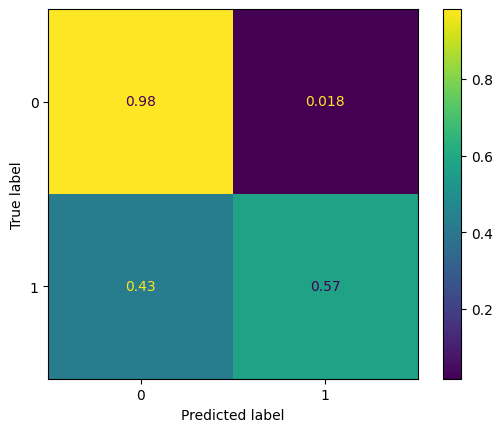

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       110
           1       0.95      0.57      0.72        68

    accuracy                           0.83       178
   macro avg       0.87      0.78      0.80       178
weighted avg       0.85      0.83      0.81       178



### Entrenando un Random Forest (Extra)

Utilizaremos `sklearn` para entrenar un Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Entrenamos nuestro random forest.

In [ ]:
random_forest = RandomForestClassifier(criterion="entropy", max_depth=3)
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)

Medimos su rendimiento con el set de `test`.

In [ ]:
metrics.accuracy_score(y_test, y_predict)

0.7696629213483146

Observamos que tiene un rendimiento de 80% con el set de `test`.

Visualicemos ahora los resultados con su matriz de confusión

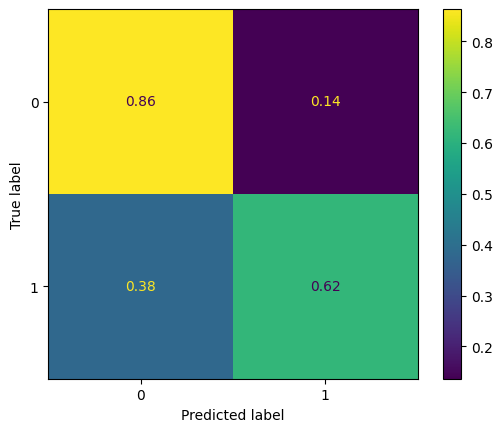

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()